<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9E%D1%82%D1%80%D1%8B%D0%B2_%D0%BE%D1%82_%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%B2%D0%B5%D1%81%D0%BD%D0%BE%D0%B9_%D1%81_%D0%BA%D0%BE%D1%80%D0%BE%D1%82%D0%BA%D0%B8%D0%BC_%D0%BB%D0%B0%D0%B3%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [1]:
! pip install bt
! pip install git+https://github.com/prog815/progGA

     |████████████████████████████████| 2.7MB 4.9MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533272 sha256=9865e328874cb7d5aac3bd7fd1e50565d66e833af50dfff59ab751ec06040604
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=4f9f8cf50c5e917b2111e02c8f279017ecb0b6e0a0be20237a530b525ebe007e
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn
  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-c0w97l8y
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-c0w97l8y
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3733 sha256=6b7e49001e538fcddf4433ae3a8194b2a2d27a714c2c3291328cb248282e68c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-xsy93dhx/wheels/9c/7a/cc/d1ffa9ccaa42b

In [2]:
import bt
from progGA import ListGenetic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os

fn = '/content/drive/My Drive/prog/model_orkl_04.11.2020.pkl'

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [29]:
! pip install git+https://github.com/prog815/portfOptim

  Cloning https://github.com/prog815/portfOptim to /tmp/pip-req-build-6s9w9rba
  Running command git clone -q https://github.com/prog815/portfOptim /tmp/pip-req-build-6s9w9rba
  Created wheel for portfOptim: filename=portfOptim-0.0.4-cp36-none-any.whl size=3097 sha256=05cfe1e87fc18ea97b6e6f5149dfba9b631ddde82b3e1ec30f20167373e6919c
  Stored in directory: /tmp/pip-ephem-wheel-cache-c4lip00x/wheels/ef/8b/25/89eadb83696c6f13f7c19550677e232c32182db7884471ca86
Successfully built portfOptim


In [30]:
import portfOptim

# Загрузка истории

In [44]:
#data = bt.get('AAPL,AAL,GE,F',start='2010-01-01')
data = bt.get(['AAPL','GE','BAC','AMD','PLUG','F'],start='2010-01-01')
lenData = len(data)
data

,aapl,ge,bac,amd,plug,f
Date,,,,,,
2010-01-04,6.604801,10.840267,13.816905,9.700000,7.000000,6.937616
2010-01-05,6.616219,10.896401,14.266021,9.710000,7.000000,7.396526
2010-01-06,6.510980,10.840267,14.433337,9.570000,6.700000,7.673220
2010-01-07,6.498945,11.401575,14.908874,9.470000,6.700000,7.868933
2010-01-08,6.542150,11.647147,14.776777,9.430000,6.800000,7.889179
...,...,...,...,...,...,...
2020-10-29,115.320000,7.370000,23.540001,78.019997,14.810000,7.900000
2020-10-30,108.860001,7.420000,23.700001,75.290001,14.000000,7.730000
2020-11-02,108.769997,7.520000,24.080000,74.699997,15.470000,7.710000


In [45]:
dData = data.to_returns()
dData

,aapl,ge,bac,amd,plug,f
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,0.032505,0.001031,0.000000,0.066148
2010-01-06,-0.015906,-0.005152,0.011728,-0.014418,-0.042857,0.037409
2010-01-07,-0.001848,0.051780,0.032947,-0.010449,0.000000,0.025506
2010-01-08,0.006648,0.021538,-0.008860,-0.004224,0.014925,0.002573
...,...,...,...,...,...,...
2020-10-29,0.037050,-0.006739,0.002983,0.021204,0.000676,0.025974
2020-10-30,-0.056018,0.006784,0.006797,-0.034991,-0.054693,-0.021519
2020-11-02,-0.000827,0.013477,0.016034,-0.007836,0.105000,-0.002587


# Алгоритм распределения

# Поиск гиперпараметров

## Целевая функция

In [75]:
def getQualityMethod(lookback=100,lag=10):

    randPoint = np.random.randint(2*lag+lookback+1,lenData-1-2*lag)
    
    # выборки
    learnData = dData.iloc[(randPoint-lookback):randPoint]
    validData = dData.iloc[randPoint:(randPoint+lag)]

    # оптимальные веса
    weights = bt.ffn.calc_mean_var_weights(learnData).values
    # weights = portfOptim.portfSharpOptim(learnDoh,learnCov)

    # ковариация и доходность на отборе
    validCov = validData.cov().values
    validDoh = validData.mean().values

    def calcSharpe(covar,mean,w):
        doh = np.matmul(mean,w)
        var = np.matmul(np.matmul(w, covar), w)
        return doh / np.sqrt(var)

    portfOptim.koefSharp

    # коэффициент Шарпа на отборе для оптимальной стратегии
    optimKoef = calcSharpe(validCov,validDoh,weights)
    
    # коэффициент Шарпа на отборе для равновесной стратегии
    eqKoef = calcSharpe(validCov,validDoh,np.ones_like(weights)/len(weights))
    
    # возвращаем разницу коэффициентов
    return optimKoef - eqKoef
    

getQualityMethod()

-0.8840861791311835

## Создание модели

In [76]:
modelGA = ListGenetic(pop_size=200,
                      lookback=range(30,400),
                      quality_method=getQualityMethod)

if os.path.exists(fn):
    with open(fn,'rb') as fp:
        modelGA = pickle.load(fp)

## Бесконечный цикл поиска

In [77]:
while True:
    modelGA.fit(100,echo_time=60)
    with open(fn,'wb') as fp:
        pickle.dump(modelGA,fp)

finish -  54897 {'quality': -0.03357561395785583, 'lookback': 307}
finish -  54997 {'quality': 0.13016566829550974, 'lookback': 319}
finish -  55097 {'quality': 0.3115680687562192, 'lookback': 261}
finish -  55197 {'quality': -0.10943825366972817, 'lookback': 261}
finish -  55297 {'quality': 0.08293510204416792, 'lookback': 274}
finish -  55397 {'quality': -0.2627159545330142, 'lookback': 285}
finish -  55497 {'quality': 0.42965221391827924, 'lookback': 307}
finish -  55597 {'quality': -0.14189072946703699, 'lookback': 298}
finish -  55697 {'quality': 0.10986006054165859, 'lookback': 276}
finish -  55797 {'quality': -0.17673062899528685, 'lookback': 273}
finish -  55897 {'quality': -0.34816360872976143, 'lookback': 277}
finish -  55997 {'quality': -0.1106653815166827, 'lookback': 273}
finish -  56097 {'quality': 0.44924811163063966, 'lookback': 291}
finish -  56197 {'quality': 0.42383380304801666, 'lookback': 277}
finish -  56297 {'quality': 0.6157059845525257, 'lookback': 283}
finish 

KeyboardInterrupt: ignored

## Графики

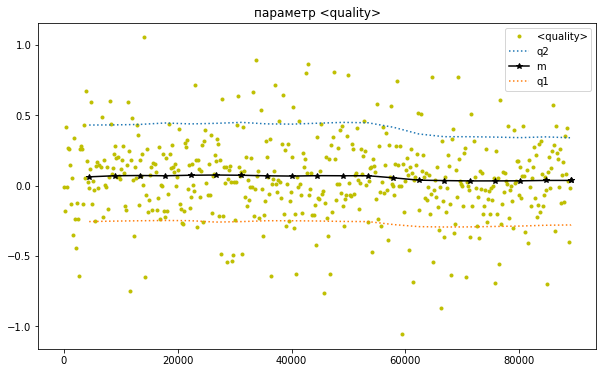

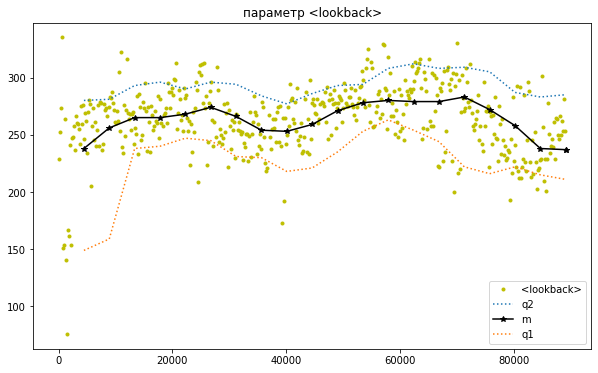

In [78]:
modelGA.plot_hist_new(('quality','lookback'))


## Параметры лучшей

In [79]:
best_par = modelGA.getBestParams()
best_par

{'lookback': 262}

# Прогон лучшей

In [80]:
lookback_best = best_par['lookback']
lag_best = 10

s_best = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(lag_best,offset=lag_best*2+lookback_best+1),
                                bt.algos.SelectAll(),
                                bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback_best)),
                                bt.algos.Rebalance()])
test_best = bt.Backtest(s_best, data)

s0 = bt.Strategy('равновесный', [bt.algos.RunEveryNPeriods(lag_best,offset=lag_best*2+lookback_best+1),
                                 bt.algos.SelectAll(),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()])
test0 = bt.Backtest(s0, data)

res_best = bt.run(test_best,test0)

лучший
0% [############################# ] 100% | ETA: 00:00:00равновесный
0% [############################# ] 100% | ETA: 00:00:00

## График баланса

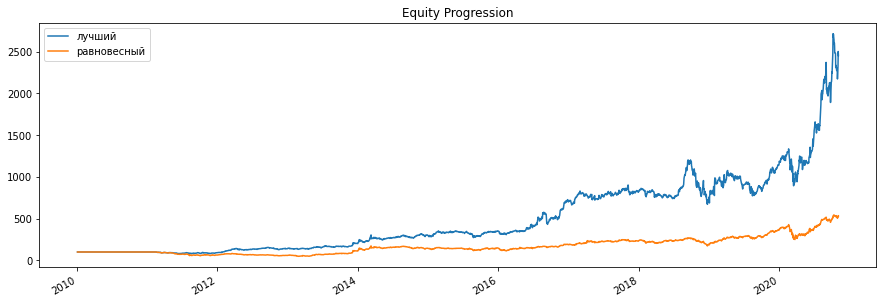

In [81]:
res_best.plot()

## график распределения долей

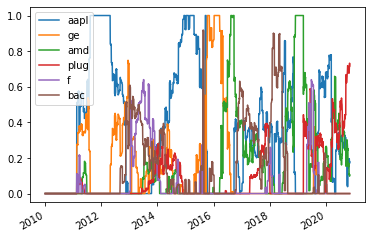

In [82]:
res_best.get_security_weights().plot()

## итог

In [83]:
res_best.display()

Stat                 лучший      равновесный
-------------------  ----------  -------------
Start                2010-01-03  2010-01-03
End                  2020-11-04  2020-11-04
Risk-free rate       0.00%       0.00%

Total Return         2353.51%    432.16%
Daily Sharpe         1.06        0.68
Daily Sortino        1.77        1.09
CAGR                 34.35%      16.68%
Max Drawdown         -44.22%     -52.45%
Calmar Ratio         0.78        0.32

MTD                  12.91%      5.32%
3m                   32.23%      17.30%
6m                   114.87%     76.16%
YTD                  113.66%     46.65%
1Y                   152.92%     64.72%
3Y (ann.)            39.64%      28.83%
5Y (ann.)            48.94%      28.97%
10Y (ann.)           37.71%      18.19%
Since Incep. (ann.)  34.35%      16.68%

Daily Sharpe         1.06        0.68
Daily Sortino        1.77        1.09
Daily Mean (ann.)    34.93%      19.67%
Daily Vol (ann.)     32.82%      29.09%
Daily Skew           0.27  

Енин А.В.

Оренбург